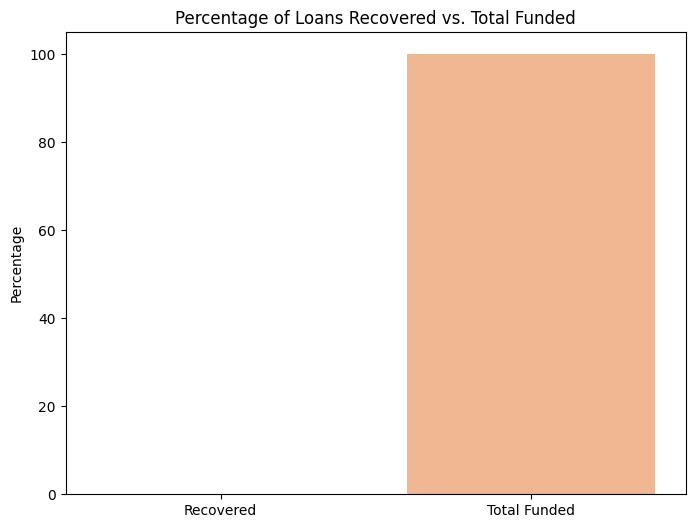

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Replace 'file_path' with the actual path to your CSV file
file_path = '/Users/fahiyeyusuf/Desktop/CLIF_data_cleaned.csv'
df = pd.read_csv(file_path)
# Calculate percentage of loans recovered against funded amount
df['recovery_rate'] = df['recoveries'] / df['loan_amount'] * 100

# Calculate total funded amount
total_funded_amount = df['loan_amount'].sum()

# Calculate total recovered amount
total_recovered_amount = df['recoveries'].sum()

# Calculate percentage of total funded amount recovered
percentage_recovered = (total_recovered_amount / total_funded_amount) * 100
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Recovered', 'Total Funded'], y=[percentage_recovered, 100], hue=['Recovered', 'Total Funded'], palette='pastel', legend=False)
plt.ylabel('Percentage')
plt.title('Percentage of Loans Recovered vs. Total Funded')
plt.show()




In [12]:
# Step 1: Filter the DataFrame for charged off loans
charged_off_loans = df[df['loan_status'] == 'Charged Off']

# Step 2: Calculate the percentage of charged off loans historically
charged_off_percentage = (len(charged_off_loans) / len(df)) * 100

# Step 3: Calculate the total amount paid towards charged off loans before being charged off
total_paid_charged_off = charged_off_loans['total_payment'].sum()

# Print the results
print("Percentage of Charged Off Loans: {:.2f}%".format(charged_off_percentage))
print("Total Amount Paid Towards Charged Off Loans: ${:,.2f}".format(total_paid_charged_off))


Percentage of Charged Off Loans: 3.72%
Total Amount Paid Towards Charged Off Loans: $8,038.95


/var/folders/xt/whgjpqys65g6z29_83ct_xf00000gn/T/ipykernel_36731/1099049333.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['term'] = charged_off_loans['term'].astype(str)
/var/folders/xt/whgjpqys65g6z29_83ct_xf00000gn/T/ipykernel_36731/1099049333.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['term'] = charged_off_loans['term'].str.extract('(\d+)').astype(float)
/var/folders/xt/whgjpqys65g6z29_83ct_xf00000gn/T/ipykernel_36731/1099049333.py:15: SettingWithCopyWa

Length of DataFrame after Step 2: 932
Length of DataFrame after Step 3: 932
Length of DataFrame after Step 4: 932
Length of DataFrame after Step 5: 932
Data Types after Conversion:
Remaining Term: float64
Projected Loss: float64

Missing Values after Handling:
Remaining Term: 0
Projected Loss: 0

Length of Columns: 41
Length of Keys: 932


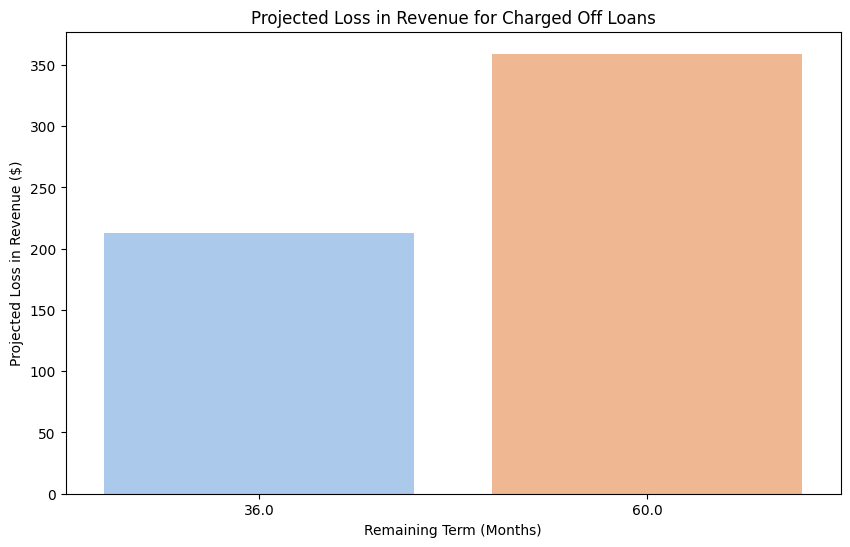

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming charged_off_loans DataFrame is already loaded

# Step 1: Convert 'term' column to string type
charged_off_loans['term'] = charged_off_loans['term'].astype(str)

# Step 2: Extract numeric part from 'term' column and convert to float
charged_off_loans['term'] = charged_off_loans['term'].str.extract('(\d+)').astype(float)
print("Length of DataFrame after Step 2:", len(charged_off_loans))

# Step 3: Handle missing values in 'loan_status' column
charged_off_loans['loan_status'].fillna('Unknown', inplace=True)
print("Length of DataFrame after Step 3:", len(charged_off_loans))

# Step 4: Calculate the remaining term
charged_off_loans['remaining_term'] = charged_off_loans['term']
print("Length of DataFrame after Step 4:", len(charged_off_loans))

# Step 5: Calculate the loss in revenue these loans would have generated if they had finished their term
charged_off_loans['projected_loss'] = charged_off_loans['remaining_term'] * charged_off_loans['instalment']
print("Length of DataFrame after Step 5:", len(charged_off_loans))

# Step 6: Convert data types to float
charged_off_loans['remaining_term'] = charged_off_loans['remaining_term'].astype(float)
charged_off_loans['projected_loss'] = charged_off_loans['projected_loss'].astype(float)

# Step 7: Handle missing values
charged_off_loans['remaining_term'].fillna(0, inplace=True)
charged_off_loans['projected_loss'].fillna(0, inplace=True)

# Step 8: Verify the changes
print("Data Types after Conversion:")
print("Remaining Term:", charged_off_loans['remaining_term'].dtype)
print("Projected Loss:", charged_off_loans['projected_loss'].dtype)

print("\nMissing Values after Handling:")
print("Remaining Term:", charged_off_loans['remaining_term'].isnull().sum())
print("Projected Loss:", charged_off_loans['projected_loss'].isnull().sum())

# Step 9: Check lengths of columns and keys
num_columns = len(charged_off_loans.columns)
num_keys = len(charged_off_loans)

print("\nLength of Columns:", num_columns)
print("Length of Keys:", num_keys)

# Step 10: Visualize the projected loss over the remaining term of these loans
plt.figure(figsize=(10, 6))
sns.barplot(x=charged_off_loans['remaining_term'], y=charged_off_loans['projected_loss'], palette='pastel', ci=None, err_kws={'color': 'grey'})
plt.xlabel('Remaining Term (Months)')
plt.ylabel('Projected Loss in Revenue ($)')
plt.title('Projected Loss in Revenue for Charged Off Loans')
plt.show()


In [18]:
import pandas as pd

# Assuming the data is loaded into the 'data' DataFrame
data = pd.read_csv('/Users/fahiyeyusuf/Desktop/CLIF_data_cleaned.csv')

# Display the first few rows of the dataframe
print(data.head())

# Print the column names to ensure we have the correct columns
print(data.columns)

# Step 1: Inspect loan statuses
print(data['loan_status'].unique())

# Step 4: Calculate the percentage of customers behind on payments
late_statuses = ['Late (16-30 days)', 'Late (31-120 days)', 'Default', 'In Grace Period']

# Filter customers behind on payments
customers_behind = data[data['loan_status'].isin(late_statuses)].copy()

# Calculate the percentage of customers behind on payments
total_customers = len(data)
total_customers_behind = len(customers_behind)
percentage_behind = (total_customers_behind / total_customers) * 100
print(f"Percentage of customers behind on payments: {percentage_behind:.2f}%")

# Step 5: Calculate the total amount of loss if converted to charged off
total_loss_if_charged_off = customers_behind['out_prncp'].sum()
print(f"Total potential loss if customers behind on payments are charged off: ${total_loss_if_charged_off:.2f}")

# Step 6: Convert 'term' from strings to integers
data['term'] = data['term'].str.extract('(\d+)').astype(int)
customers_behind['term'] = customers_behind['term'].str.extract('(\d+)').astype(int)

# Calculate 'monthly_int_rate'
customers_behind['monthly_int_rate'] = customers_behind['int_rate'] / 100 / 12

# Calculate projected loss if customers finish full term
customers_behind['total_remaining'] = customers_behind['out_prncp'] + (customers_behind['monthly_int_rate'] * customers_behind['out_prncp'] * customers_behind['term'])
projected_loss_full_term = customers_behind['total_remaining'].sum()
print(f"Projected loss if customers behind on payments finish their full term: ${projected_loss_full_term:.2f}")

# Step 7: Calculate the percentage of total expected revenue represented by late and charged off customers
charged_off_customers = data[data['loan_status'] == 'Charged Off'].copy()

# Calculate 'monthly_int_rate' and 'total_remaining' for the main data
data['monthly_int_rate'] = data['int_rate'] / 100 / 12
data['total_remaining'] = data['out_prncp'] + (data['monthly_int_rate'] * data['out_prncp'] * data['term'])

# Calculate 'total_remaining' for charged off customers
charged_off_customers['monthly_int_rate'] = charged_off_customers['int_rate'] / 100 / 12
charged_off_customers['total_remaining'] = charged_off_customers['out_prncp'] + (charged_off_customers['monthly_int_rate'] * charged_off_customers['out_prncp'] * charged_off_customers['term'])

# Calculate total expected revenue and combined loss
total_expected_revenue = data['total_remaining'].sum()
combined_loss = customers_behind['total_remaining'].sum() + charged_off_customers['total_remaining'].sum()
percentage_of_total_revenue = (combined_loss / total_expected_revenue) * 100
print(f"Percentage of total expected revenue represented by late and charged off customers: {percentage_of_total_revenue:.2f}%")


         id  member_id  loan_amount  int_rate  instalment  annual_inc    dti  \
0  38656203   41440010        13200      6.99    6.012541   10.819798  24.20   
1  38656063   41439868        10000     12.99    5.431449   10.820758  20.67   
2  38656023   41439828         7200      8.19    5.426095   11.373675  14.41   
3  38655994   41439798        10000      6.99    5.735701   11.589896   3.20   
4  38655925   41439729        12000     13.16    5.935132   10.763356  32.15   

   delinq_2yrs  inq_last_6mths  mths_since_last_delinq  ...  \
0          0.0        0.000000                3.465736  ...   
1          0.0        0.000000                3.465736  ...   
2          0.0        0.000000                3.465736  ...   
3          0.0        0.693147                3.465736  ...   
4          0.0        0.000000                3.465736  ...   

   verification_status  issue_date  loan_status  payment_plan  \
0         Not Verified      Jan-21      Current             n   
1      Sou

/var/folders/xt/whgjpqys65g6z29_83ct_xf00000gn/T/ipykernel_36731/3350962437.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=charged_off, x=indicator, order=charged_off[indicator].value_counts().index, palette='viridis')


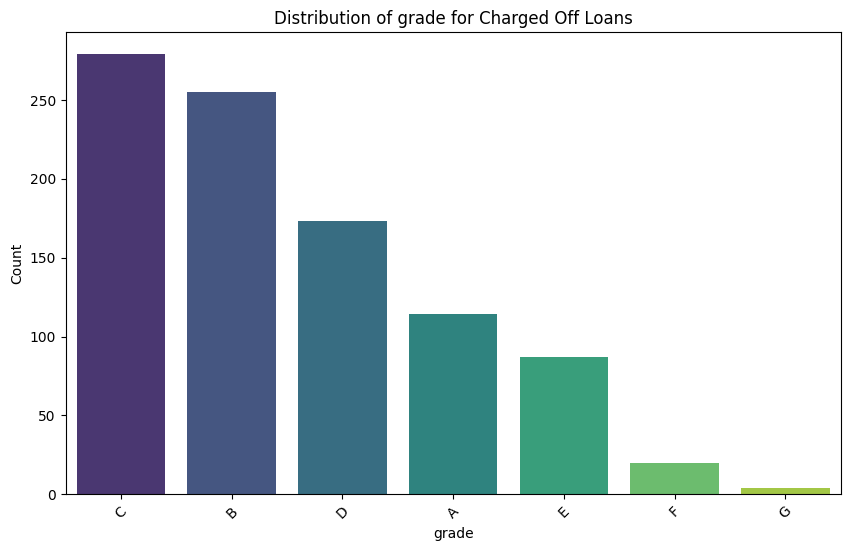

/var/folders/xt/whgjpqys65g6z29_83ct_xf00000gn/T/ipykernel_36731/3350962437.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=behind_on_payments, x=indicator, order=behind_on_payments[indicator].value_counts().index, palette='viridis')


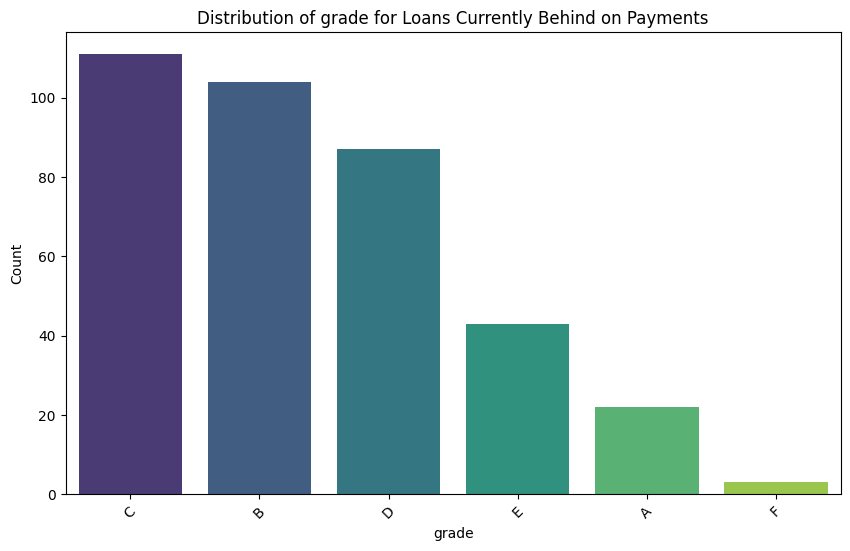

/var/folders/xt/whgjpqys65g6z29_83ct_xf00000gn/T/ipykernel_36731/3350962437.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=charged_off, x=indicator, order=charged_off[indicator].value_counts().index, palette='viridis')


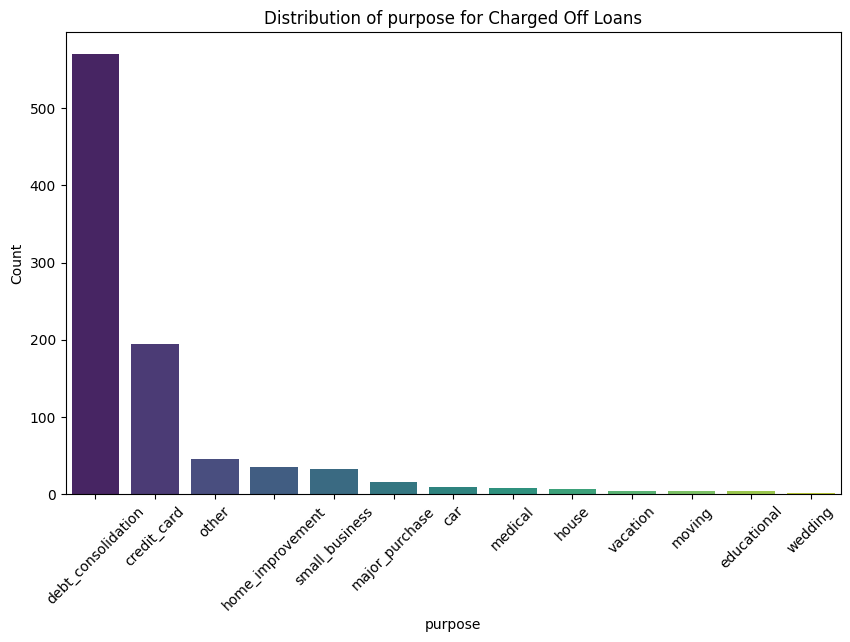

/var/folders/xt/whgjpqys65g6z29_83ct_xf00000gn/T/ipykernel_36731/3350962437.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=behind_on_payments, x=indicator, order=behind_on_payments[indicator].value_counts().index, palette='viridis')


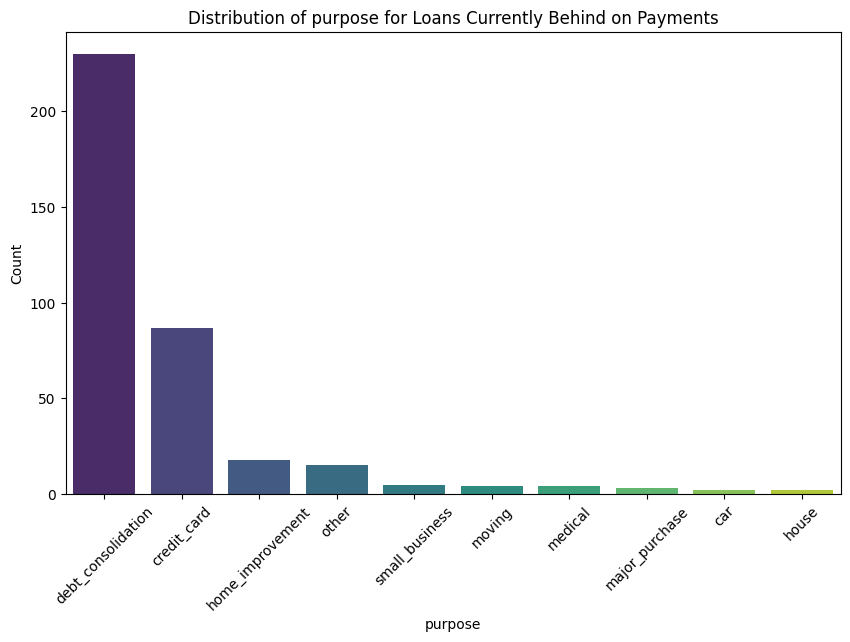

/var/folders/xt/whgjpqys65g6z29_83ct_xf00000gn/T/ipykernel_36731/3350962437.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=charged_off, x=indicator, order=charged_off[indicator].value_counts().index, palette='viridis')


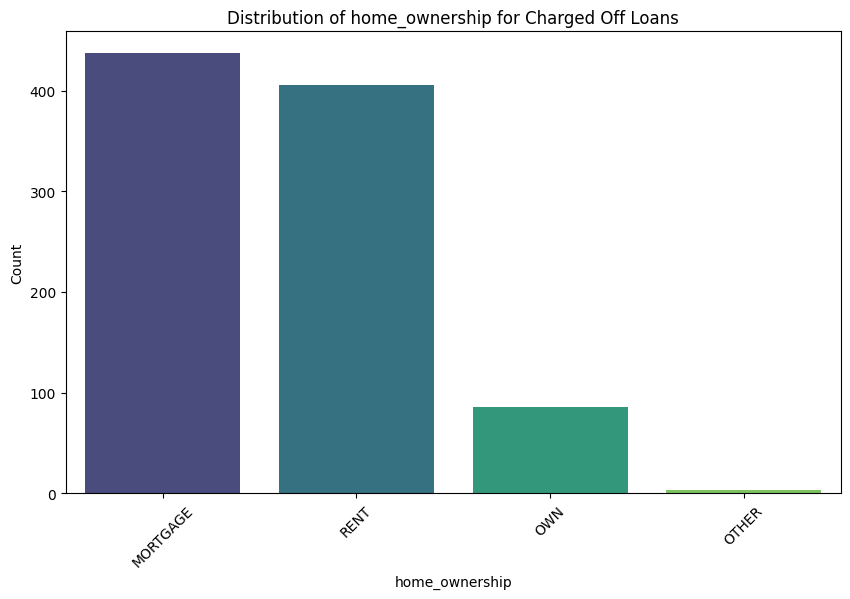

/var/folders/xt/whgjpqys65g6z29_83ct_xf00000gn/T/ipykernel_36731/3350962437.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=behind_on_payments, x=indicator, order=behind_on_payments[indicator].value_counts().index, palette='viridis')


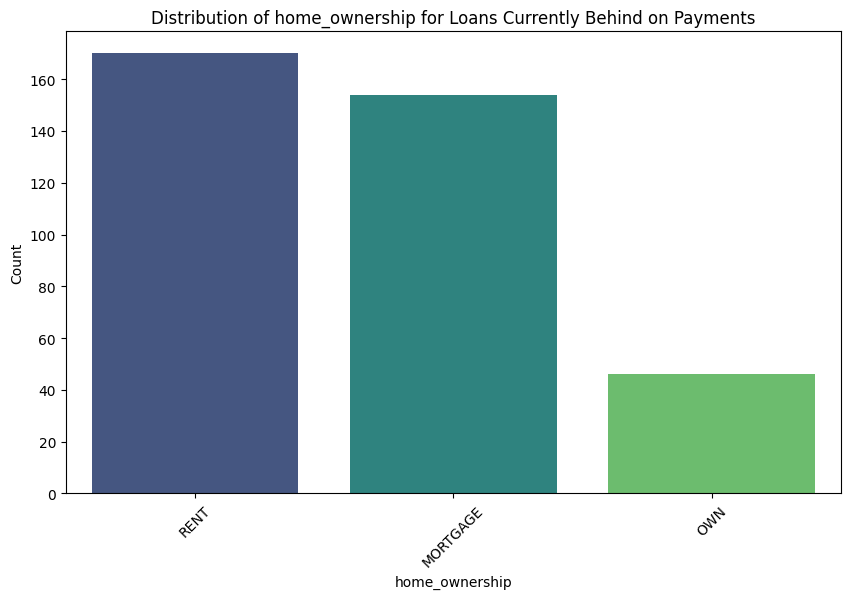

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('/Users/fahiyeyusuf/Desktop/CLIF_data_cleaned.csv')

# Create subsets of charged off users and users currently behind on payments
charged_off = data[data['loan_status'] == 'Charged Off']
behind_on_payments = data[data['loan_status'].isin(['Late (16-30 days)', 'Late (31-120 days)', 'Default', 'In Grace Period'])]

# Define potential indicators
potential_indicators = ['grade', 'purpose', 'home_ownership']

# Analyze potential indicators
for indicator in potential_indicators:
    # Plot distribution of indicator for charged off loans and loans currently behind on payments
    plt.figure(figsize=(10, 6))
    sns.countplot(data=charged_off, x=indicator, order=charged_off[indicator].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {indicator} for Charged Off Loans')
    plt.xlabel(indicator)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.countplot(data=behind_on_payments, x=indicator, order=behind_on_payments[indicator].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {indicator} for Loans Currently Behind on Payments')
    plt.xlabel(indicator)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

